# Introduction
For several years, I have been a fan of the YouTube channel, 2BRO [(兄者弟者)](https://www.youtube.com/user/norunine). The channel consists of three Japanese men hosting gameplays of popular games, particularly FPS and horror games. They currently have over 3 million subscribers and have been active since May 2010. 

Recently, after discovering a method to extract the YouTube API data from the YouTuber/ Data scientist,  [Thu Vu](https://youtu.be/D56_Cx36oGY),  I was intrigued to explore the data related to one of my favourite YouTube channels. 

One aspect that particularly caught my attention was the variable like counts and how it related to other variables such as view count.

In [1]:
# Libraries for handling data 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Library specific to Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Library for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
import plotly.express as px

/kaggle/input/-2bro-youtube-aip-data/2Bro video data.csv


# Overview 

Using the [method](https://github.com/thu-vu92/youtube-api-analysis) outlined by Thu Vu, a relatively clean dataset can be obtained. For 2BRO, this entails a dataset of just under 8000 videos as of 28th May 2022. The variables include titles and descriptions as well as length of videos and publication date. 

The focus of this project will be on the relationship between likes and other variables. However, prior to modelling the data, an understanding of the data is required. During the EDA, any outliers that may affect the model may also be identified.

As for the relationships, to ensure that this hypothesis is does not simply examine whether the two variables a correlated the following may be evaluated. 

    Null hypothesis - There is no linear relationship between (independent variable) and likes (dependent variable).

In [2]:
# import dataset
df = pd.read_csv("/kaggle/input/-2bro-youtube-aip-data/2Bro video data.csv", index_col = "video_id" )

In [3]:
# view top 5 rows of dataset 
df.head(5)

,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
video_id,,,,,,,,,,,,,,,
Mnev7ROTbGU,兄者弟者,【デッドバイデイライト】ロッカーの申し子弟者 #shorts,"【ゴールデンデドバイ】弟者,おついちの「デッドバイデイライト（DbD）」【2BRO.】#26...","['2BRO.', 'ホラー', '弟者', 'Dead by Daylight', 'デッ...",2022-05-28 13:00:21+00:00,82177.0,2521.0,NaN,35.0,PT10S,hd,False,Saturday,10.0,12
uGnIYBuucnc,兄者弟者,#1【ホラー】弟者の「頭痛（HEADACHE）」【2BRO.】,★最新投稿情報はツイッターで！《@Otojya》https://twitter.com/ot...,"['2BRO.', 'ホラー', '弟者', 'ゲーム実況', '実況', 'アクション',...",2022-05-28 11:00:32+00:00,154606.0,2761.0,NaN,102.0,PT26M55S,hd,False,Saturday,1615.0,10
vNe26_L47Js,兄者弟者,"【BP2倍だってー！？】弟者,おついちの「デッドバイデイライト（DbD）」【2BRO.】#277","【デッドバイデイライトの""生放送""再生リスト】https://www.youtube.com...","['2BRO.', 'ホラー', '弟者', 'Dead by Daylight', 'デッ...",2022-05-28 09:14:23+00:00,150003.0,2251.0,NaN,14.0,PT4H9M36S,hd,False,Saturday,14976.0,12
wLvYqjQvaMs,兄者弟者,#47【ナイトランナーに必要なもの】弟者の「ダイイングライト2 ステイ ヒューマン」【2BRO.】,公式サイト：https://bit.ly/2broDL2\n\n【ダイイングライト2の再生リ...,"['ゲーム実況', '実況', '弟者', '2BRO', 'FPS', 'アクションホラー...",2022-05-28 09:00:22+00:00,23417.0,616.0,NaN,50.0,PT29M8S,hd,False,Saturday,1748.0,15
70YHp-8Fbxg,兄者弟者,"【ホラー】弟者,兄者,おついち,メロ「Occult（オカルト）」【2BRO.】",★最新投稿情報はツイッターで！《@Otojya》https://twitter.com/ot...,NaN,2022-05-27 14:17:28+00:00,440643.0,6388.0,NaN,134.0,PT1H43M59S,hd,False,Friday,6239.0,0


In [4]:
# check basic stats for the data including data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7998 entries, Mnev7ROTbGU to GQPXCXLLbt0
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   channelTitle      7998 non-null   object 
 1   title             7998 non-null   object 
 2   description       7998 non-null   object 
 3   tags              7906 non-null   object 
 4   publishedAt       7998 non-null   object 
 5   viewCount         7998 non-null   float64
 6   likeCount         7998 non-null   float64
 7   favouriteCount    0 non-null      float64
 8   commentCount      7998 non-null   float64
 9   duration          7998 non-null   object 
 10  definition        7998 non-null   object 
 11  caption           7998 non-null   bool   
 12  pushblishDayName  7998 non-null   object 
 13  durationSecs      7998 non-null   float64
 14  tagCount          7998 non-null   int64  
dtypes: bool(1), float64(5), int64(1), object(8)
memory usage: 945.1+ KB


# EDA
## Amending variables
As there are no values in favourite counts, this column can be dropped. In addition, as Thu Vu's method included coding to convert the duration listed in PT to seconds, the original duration can be likewise dropped.  


In [5]:
# drop favourite counts and duration columns 
df.drop(["favouriteCount","duration" ], axis = 1, inplace = True)

Furthermore, the publication variable includes both dates and time. As such, it may be best to separate the the data into two variables, with the date being appropriately formatted.  

In [6]:
# seperate published at variable which includes date and time to two variables
df[["Publish_date", "Publish_time"]] = df["publishedAt"].str.split(" ", expand = True)

# reformat date variable to datetime 
df["Publish_date"] = pd.to_datetime(df["Publish_date"], format = "%Y-%m-%d")

# drop published at variable
df.drop(["publishedAt" ], axis = 1, inplace = True)

## Duration 
There are a myriad of places to begin examining the variables. However, one aspect that is of particular intriguing as a subscriber to the channel is the duration of the videos. 2BRO frequently host extremely long videos and as a general observer, it is unclear if these are outliers. In addition, YouTube has recently introduced shorts and these operate differently from typical videos. 2BRO have also recently been to use this feature. 

In [7]:
# view distribution of durationSecs variable
fig = px.histogram(df, x ="durationSecs",)
fig.update_layout(title_text="Length of videos", title_x=0.5)

### Shorts
Shorts are clips which are [60 seconds or under](https://support.google.com/youtube/answer/10059070?hl=en-GB#:~:text=YouTube%20Shorts%20is%20a%20way,with%20our%20multi%2Dsegment%20camera). These clips operate in a different manner to typical videos. Consequently, the dataset can be divided into those which are above and below 60 seconds. For 2BRO, there is 116 shorts and 7881 videos. 

In [8]:
# seperate clips to those that are less than 60secs (shorts) and longer than 60secs (videos)
shorts = df[df["durationSecs"]<60]
videos = df[df["durationSecs"]>60]

In [9]:
# print the number of clips in both datasets 
print( "There are", shorts.shape[0], "shorts and", videos.shape[0], "videos")

There are 116 shorts and 7881 videos


### Video
Examining the videos further, the average video is 47mins long. There are also  extremely long videos. The maximum runtime for one video is approx. 8 hours. 

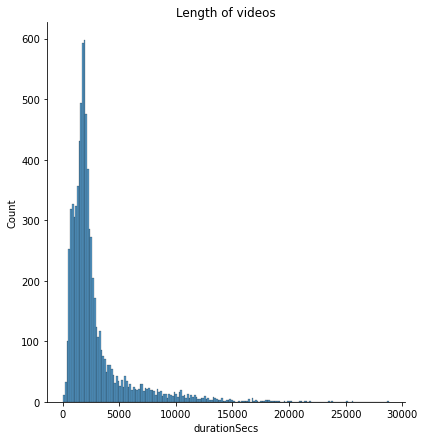

In [10]:
# view distribution of durationSecs variable for videos
sns.displot(x = "durationSecs", data = videos,height =6)
plt.title("Length of videos")

plt.show()

In [11]:
# descriptive statistics for durationSecs on videos 
videos["durationSecs"].describe()

count     7881.000000
mean      2815.524553
std       2777.801543
min         61.000000
25%       1386.000000
50%       1952.000000
75%       2882.000000
max      28823.000000
Name: durationSecs, dtype: float64

In [12]:
# print key stats for durationSecs on videos 
print("Average videos are", round(videos["durationSecs"].mean()/60,0), "mins long, with the longest video approx.", round((videos["durationSecs"].max()/60)/60,0), "hours long.")

Average videos are 47.0 mins long, with the longest video approx. 8.0 hours long.


In [13]:
# Data on the longest video
videos[videos["durationSecs"]==videos["durationSecs"].max()]

,channelTitle,title,description,tags,viewCount,likeCount,commentCount,definition,caption,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time
video_id,,,,,,,,,,,,,,
zAS4UTzo8vE,兄者弟者,#219【ほろ酔い】弟者の「デッドバイデイライト（DbD）」【2BRO.】,"【デッドバイデイライトの""生放送""再生リスト】https://www.youtube.com...","['2BRO.', 'ホラー', '弟者', 'Dead by Daylight', 'デッ...",481357.0,4794.0,166.0,hd,False,Monday,28823.0,12,2022-01-24,20:55:45+00:00


### Radio
In addition to games, 2BRO also has a monthly wrap up in the form of a radio show. This series currently have 154 episodes, based on the title of the most recent episode.  However, after extracting the data, it appears that the numerical values do not include special episodes (特別番組). Including such episodes, there are 157 episodes in total.


In [14]:
# extract videos with the phrase 2broRadio in the title
radio = videos[videos['title'].str.contains("2broRadio")]

In [15]:
# check unqiue values in the title variable
radio["title"].unique()

array(['2broRadio【vol.154】', '2broRadio【vol.153】※一部音声不具合あり',
       '2broRadio【vol.152】', '2broRadio【vol.151】', '2broRadio【vol.150】',
       '2broRadio【vol.149】', '2broRadio【vol.148】', '2broRadio【vol.147】',
       '2broRadio【vol.146】', '2broRadio【vol.145】', '2broRadio【vol.144】',
       '2broRadio【vol.143】', '2broRadio【vol.142】', '2broRadio【vol.141】',
       '2broRadio【vol.140】', '2broRadio【vol.139】',
       '2broRadio【vol.138】2021年初ラジオ', '2broRadio【vol.137】2020年ラスト',
       '2broRadio【vol.136】', '2broRadio【vol.135】', '2broRadio【vol.134】',
       '2broRadio【vol.133】', '2broRadio【vol.132】', '2broRadio【vol.131】',
       '【サイバーパンク2077最新情報】2broRadio【特別番組】', '2broRadio【vol.130】',
       '2broRadio【vol.129】with 大塚明夫さん', '2broRadio【vol.128】',
       '2broRadio【vol.127】', '2broRadio【vol.126】', '2broRadio【vol.125】',
       '2broRadio【vol.124】', '2broRadio【vol.123】', '2broRadio【vol.122】',
       '2broRadio【vol.121】', '2broRadio【vol.120】', '2broRadio【vol.119】',
       '2broRadio【vol.118】', '2broRa

In [16]:
# examine overview of the videos with 2broRadio in the title
radio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, idJFQ40y9O4 to KdzPR60Z_E4
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   channelTitle      157 non-null    object        
 1   title             157 non-null    object        
 2   description       157 non-null    object        
 3   tags              151 non-null    object        
 4   viewCount         157 non-null    float64       
 5   likeCount         157 non-null    float64       
 6   commentCount      157 non-null    float64       
 7   definition        157 non-null    object        
 8   caption           157 non-null    bool          
 9   pushblishDayName  157 non-null    object        
 10  durationSecs      157 non-null    float64       
 11  tagCount          157 non-null    int64         
 12  Publish_date      157 non-null    datetime64[ns]
 13  Publish_time      157 non-null    object        
dtypes: bool(1), d

Interestingly a few radio episodes do not have tags. 

In [17]:
# videos with no tags
radio[radio["tags"].isnull()]

,channelTitle,title,description,tags,viewCount,likeCount,commentCount,definition,caption,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time
video_id,,,,,,,,,,,,,,
i-0HWU2l-aY,兄者弟者,2broRadio【vol.136】,【2broRadioの再生リスト】https://www.youtube.com/playl...,NaN,331532.0,4446.0,98.0,hd,False,Wednesday,6531.0,0,2020-12-02,11:53:36+00:00
YUUtEVvexKQ,兄者弟者,2broRadio【vol.130】,【2broRadioの再生リスト】https://www.youtube.com/playl...,NaN,707175.0,6539.0,222.0,hd,False,Monday,10341.0,0,2020-05-18,13:51:36+00:00
6jV6ArADEvU,兄者弟者,2broRadio【vol.129】with 大塚明夫さん,【2broRadioの再生リスト】https://www.youtube.com/playl...,NaN,1585094.0,52685.0,1959.0,hd,False,Monday,4711.0,0,2020-04-20,11:31:49+00:00
sGALeuTJyzc,兄者弟者,2broRadio【vol.128】,【2broRadioの再生リスト】https://www.youtube.com/playl...,NaN,343383.0,4420.0,161.0,hd,False,Monday,6403.0,0,2020-03-23,12:26:08+00:00
IUcVkh9yd1k,兄者弟者,2broRadio【vol.127】,【2broRadioの再生リスト】https://www.youtube.com/playl...,NaN,399507.0,5216.0,169.0,hd,False,Monday,5845.0,0,2020-02-24,11:45:15+00:00
1W3pU2vYJIE,兄者弟者,2broRadio【vol.126】,【2broRadioの再生リスト】https://www.youtube.com/playl...,NaN,352177.0,4756.0,136.0,hd,False,Monday,4039.0,0,2020-01-27,12:20:41+00:00


Although the channel does have other one off special episodes such as holiday specials and reports from gaming shows, as radio shows are a common feature, this is the only series that is excluded. To remove the other types of videos, in-depth review of the title or tag columns will be needed. 

In [18]:
# extract videos with no 2broRadio in the title
games = videos[~videos['title'].str.contains("2broRadio")]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7724 entries, uGnIYBuucnc to GQPXCXLLbt0
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   channelTitle      7724 non-null   object        
 1   title             7724 non-null   object        
 2   description       7724 non-null   object        
 3   tags              7647 non-null   object        
 4   viewCount         7724 non-null   float64       
 5   likeCount         7724 non-null   float64       
 6   commentCount      7724 non-null   float64       
 7   definition        7724 non-null   object        
 8   caption           7724 non-null   bool          
 9   pushblishDayName  7724 non-null   object        
 10  durationSecs      7724 non-null   float64       
 11  tagCount          7724 non-null   int64         
 12  Publish_date      7724 non-null   datetime64[ns]
 13  Publish_time      7724 non-null   object        
dtypes: bool(1), 

## Publication Day Name
The majority of YouTube channels release videos in a consistent manner. For 2BRO, this entails uploading one or more videos everyday. That being said, Monday, Tuesday and Thursday are days were the channel is most likely to not upload a video. 

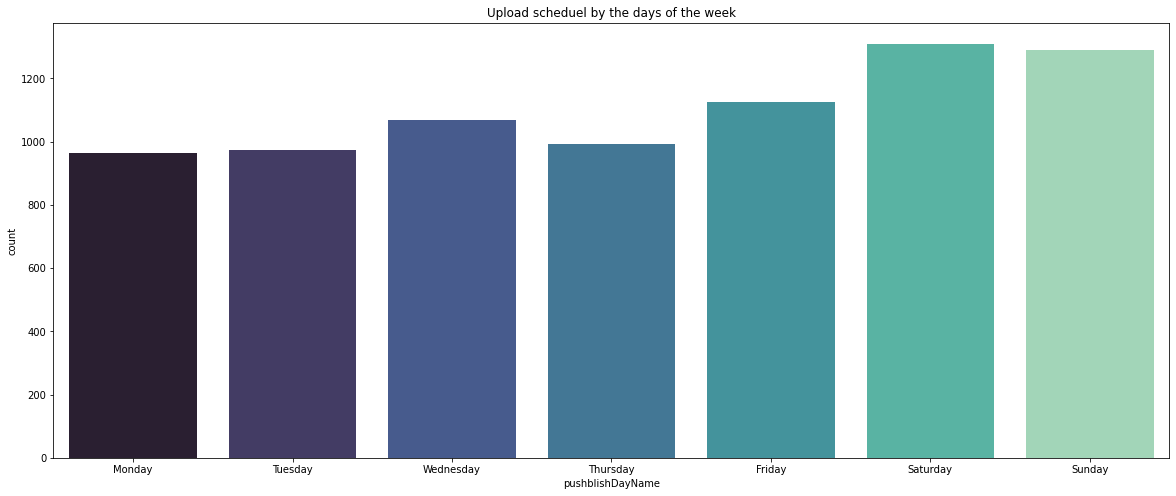

In [19]:
# visualisation upload schedule
plt.figure(figsize = (20,8))
sns.countplot(x ="pushblishDayName", data = games, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette = "mako")
plt.title("Upload scheduel by the days of the week")

plt.show()

In its current form, this variable cannot be used in the model. Subsequently, it needs to be encoded to a numerical value.

In [20]:
# import library for encoding 
from sklearn.preprocessing import LabelEncoder

In [21]:
# as operations will be conducted on slices or the orginal data, below code has been added to stop an error warning. 
pd.options.mode.chained_assignment = None

# create a new variable encording the publis day name
le = LabelEncoder()
games["pushblishDayName_code"] = le.fit_transform(games["pushblishDayName"])


## Tags
As indicated previously, there are videos which do not have any tags. Examining the data further, number of tags range from 0 to 26 and the average is around 11. The most common number of tags is slightly higher at approx. 12 tags. 

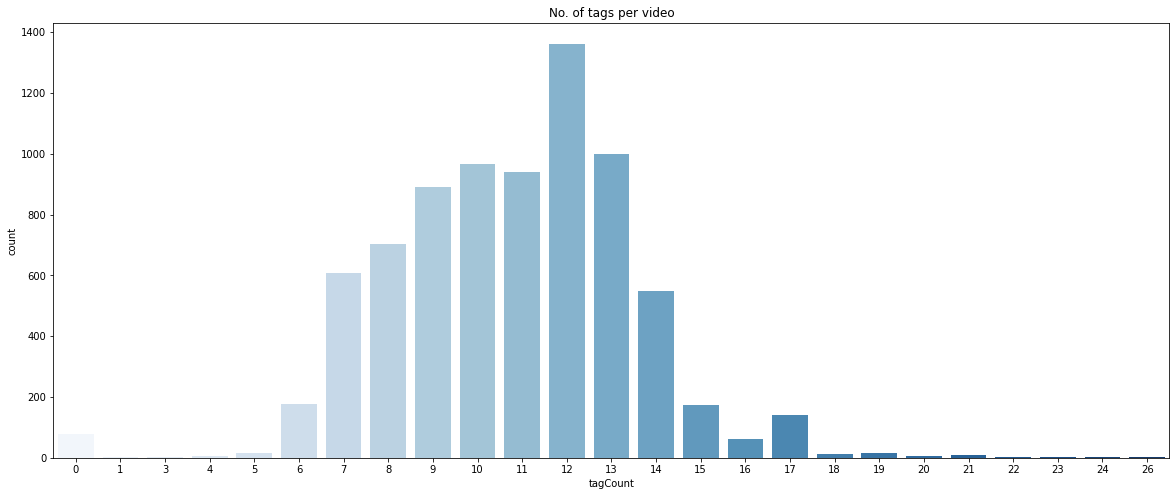

In [22]:
# visualisation of number of tags
plt.figure(figsize = (20,8))
sns.countplot(x ="tagCount", data = games, palette = "Blues")
plt.title("No. of tags per video")
plt.show()

In [23]:
# descriptive statistics on the tag count variable
games["tagCount"].describe()

count    7724.000000
mean       10.748446
std         2.762942
min         0.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        26.000000
Name: tagCount, dtype: float64

Highlighted by the boxplot, there are outliers in the number of tags. Subsequently, using the IQR, such clips can be excluded.  There are still low tag counts but the extremely low and high values have been removed. 

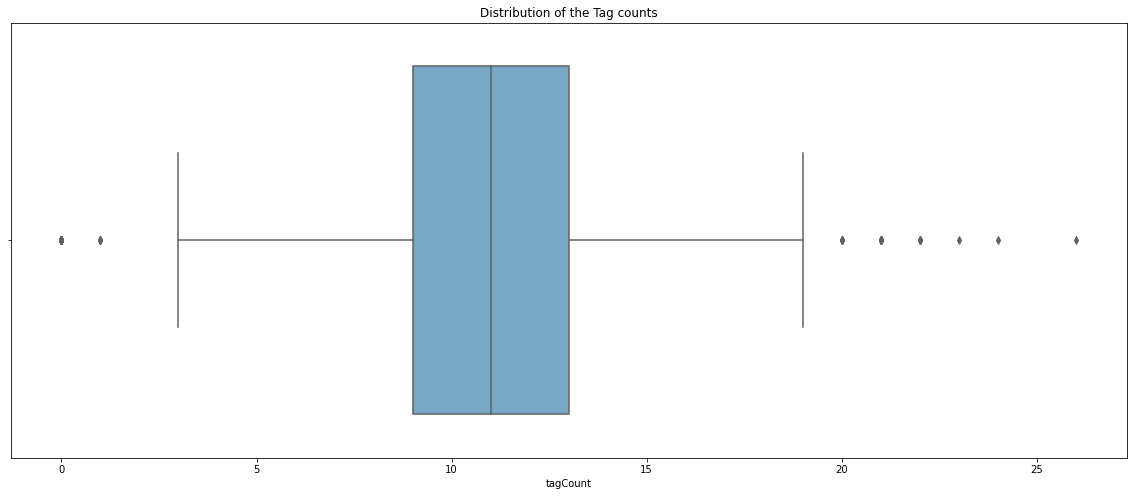

In [24]:
# distribution of tag counts and outliers
plt.figure(figsize = (20,8))
sns.boxplot(x ="tagCount", data = games, palette = "Blues")
plt.title("Distribution of the Tag counts")
plt.show()

In [25]:
# remove outliers via IQR
# locate q25 and q75
q25 = games["tagCount"].quantile(0.25)
q75 = games["tagCount"].quantile(0.75)

# identify the range
iqr = q75-q25

# secur the upper and lower limit
upper_limit = q75 + 1.5*iqr
lower_limit = q25-1.5*iqr

# excluude variables that fall above or below the limits
games_tag = games[(games["tagCount"]<= upper_limit) &(games["tagCount"]>= lower_limit)]

In [26]:
# view revised descriptive statistics
games_tag["tagCount"].describe()

count    7621.000000
mean       10.831387
std         2.485769
min         3.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        19.000000
Name: tagCount, dtype: float64

In [27]:
# examine revised dataset and the distribution of tag count
fig = px.histogram(games_tag, x ="tagCount", )

fig.update_layout(title_text = "Distribution of Tags excluding outliers", title_x = .5,)

## Definition

Since the creation of the channel in 2010, the technology around videos have transformed significantly. According to this dataset, the majority of the videos are now in HD. However, there are 72 videos that are in standard definition (SD). These may be dropped as they are now outliers within a dataset where the majority are in HD. 

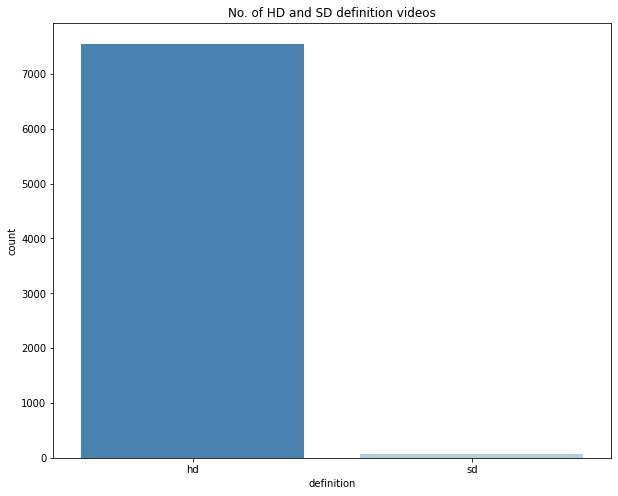

In [28]:
# Number of HD and SD definition videos
plt.figure(figsize = (10,8))

sns.countplot(x ="definition" , data =games_tag, palette = "Blues_r")
plt.title("No. of HD and SD definition videos")
plt.show()

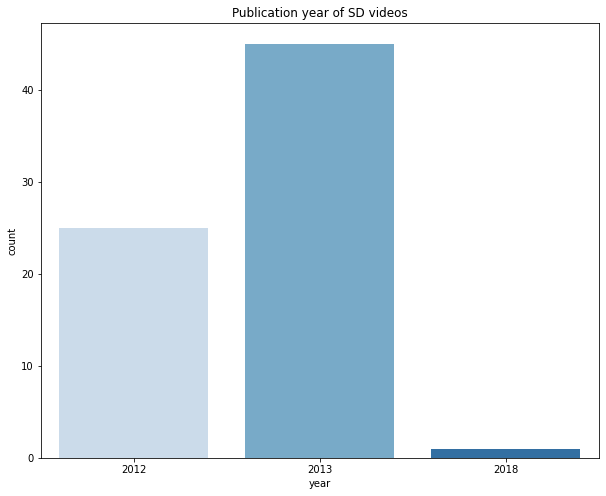

In [29]:
# extract the year from datetime variable of SD videos

sd = games_tag[games_tag["definition"]=="sd"]
sd["year"] =  sd['Publish_date'].dt.year


# Visualisation of year of publication of SD videos
plt.figure(figsize = (10,8))
sns.countplot(x= "year", data =sd, palette = "Blues")
plt.title("Publication year of SD videos")
plt.show()

In [30]:
# The SD video published in 2018
sd[sd["year"]==2018]

,channelTitle,title,description,tags,viewCount,likeCount,commentCount,definition,caption,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time,pushblishDayName_code,year
video_id,,,,,,,,,,,,,,,,
6du-HNEdxy4,兄者弟者,#4【FPS】弟者の「S.T.A.L.K.E.R.」【2BRO.】,【S.T.A.L.K.E.R.の再生リスト】https://www.youtube.com/...,"['2BRO.', 'ゲーム実況', '弟者', 'おとじゃ', 'Steam', 'S.T...",293514.0,1900.0,114.0,sd,False,Wednesday,2159.0,9,2018-07-04,09:00:00+00:00,6,2018


In [31]:
# exclude SD videos/ keep only HD videos
games_tag_hd = games_tag[games_tag["definition"]=="hd"]

## Publication date
Following some of the changes, the majority of the videos are now from 2013. However, there are still videos from 2010 in this dataset. As the number of videos between 2010 and 2013 are limited, it may be best to cap the data to post 2013. 


In [32]:
# seperate publish date vaiable to month and date
games_tag_hd["year"] =  games_tag_hd['Publish_date'].dt.year
games_tag_hd["month"] =  games_tag_hd['Publish_date'].dt.month


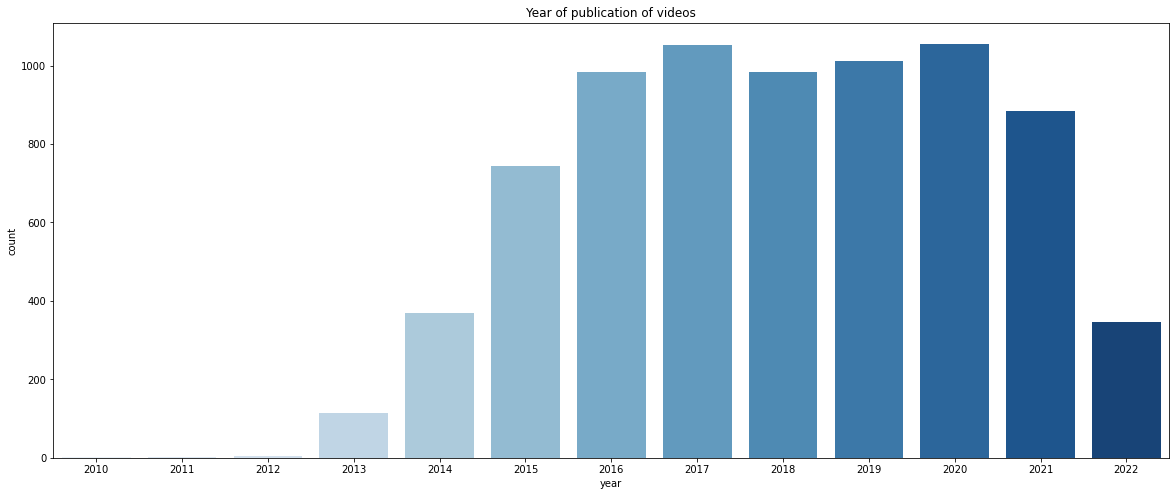

In [33]:
# distribution of videos though the years
plt.figure(figsize = (20,8))
sns.countplot(x= "year", data =games_tag_hd, palette = "Blues")
plt.title("Year of publication of videos")
plt.show()

In [34]:
# select videos published after 2013
game_post2013 = games_tag_hd[games_tag_hd["year"]>2013]

## Captions
The majority of the videos do not have a caption - only 295 videos appear to do so. However, it is unclear why these videos specifically contain captions. To avoid any unintended distortions, the videos with and without captions will be left as is. That being said, as this is a binary field may be used in the model, a dummy variable is established for this variable. 

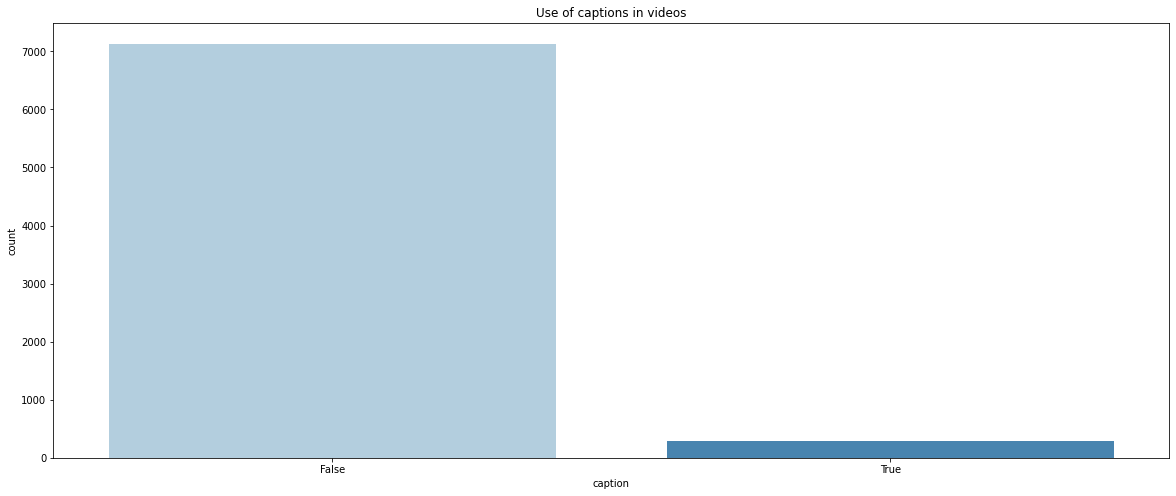

In [35]:
# Visualisation of videos with and without captions.

plt.figure(figsize = (20,8))
sns.countplot(x= "caption", data =game_post2013, palette = "Blues")
plt.title("Use of captions in videos")
plt.show()

In [36]:
# Number of videos with captions 
print("There are", sum(game_post2013["caption"]==True), "videos with captions")

There are 295 videos with captions


In [37]:
# extrac of videos with captions
game_post2013[game_post2013["caption"]==True].head()

,channelTitle,title,description,tags,viewCount,likeCount,commentCount,definition,caption,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time,pushblishDayName_code,year,month
video_id,,,,,,,,,,,,,,,,,
GwMZT7DIj-U,兄者弟者,#1【FPS】弟者の「The Spy Who Shrunk Me」【2BRO.】,【The Spy Who Shrunk Meの再生リスト】https://www.youtu...,"['2BRO.', '弟者', 'ゲーム実況', 'FPS', 'Steam', 'The ...",365066.0,3587.0,225.0,hd,True,Monday,1085.0,7,2019-07-15,11:00:01+00:00,1,2019,7
tm8Ws8McYWU,兄者弟者,#5【アクション】弟者の「Pikuniku（ピクニック）」【2BRO.】,【Pikuniku（ピクニック）の再生リスト】https://www.youtube.com...,"['2BRO.', '弟者', 'ゲーム実況', 'Steam', 'Pikuniku', ...",288042.0,3187.0,243.0,hd,True,Monday,1416.0,7,2019-04-01,11:00:06+00:00,1,2019,4
FWhmTidRxaw,兄者弟者,【まとめ】2BRO.の「2018年上半期動画総集編」【2BRO.】,【総集編の再生リスト】https://www.youtube.com/playlist?li...,"['ゲーム実況', '2BRO.', '総集編', '弟者', '兄者', 'おついち', ...",3096290.0,37033.0,2663.0,hd,True,Saturday,837.0,8,2018-06-30,13:00:03+00:00,2,2018,6
oLadv27Csso,兄者弟者,"#43【ホラー】弟者,おついちの「デッドバイデイライト シーズン4（DBD）」【2BRO.】",【シーズン4】https://www.youtube.com/playlist?list=P...,"['2BRO.', 'ホラー', '弟者', 'Dead by Daylight', '殺人...",678227.0,5851.0,304.0,hd,True,Wednesday,763.0,12,2018-06-27,12:00:11+00:00,6,2018,6
orYrSEBvjX0,兄者弟者,"#42【ホラー】弟者,おついちの「デッドバイデイライト シーズン4（DBD）」【2BRO.】",【シーズン4】https://www.youtube.com/playlist?list=P...,"['2BRO.', 'ホラー', '弟者', 'Dead by Daylight', '殺人...",643429.0,5504.0,324.0,hd,True,Tuesday,757.0,12,2018-06-26,12:00:04+00:00,5,2018,6


In [38]:
# convert captions to dummy variables
game_post2013["caption_dummy"] = pd.get_dummies(game_post2013["caption"], drop_first = True)
game_post2013.drop("caption", axis= 1, inplace = True)

In [39]:
# review details on the current dataset
game_post2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7428 entries, uGnIYBuucnc to QW59mIVOzTs
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   channelTitle           7428 non-null   object        
 1   title                  7428 non-null   object        
 2   description            7428 non-null   object        
 3   tags                   7428 non-null   object        
 4   viewCount              7428 non-null   float64       
 5   likeCount              7428 non-null   float64       
 6   commentCount           7428 non-null   float64       
 7   definition             7428 non-null   object        
 8   pushblishDayName       7428 non-null   object        
 9   durationSecs           7428 non-null   float64       
 10  tagCount               7428 non-null   int64         
 11  Publish_date           7428 non-null   datetime64[ns]
 12  Publish_time           7428 non-null   object     

## Likes 
As the graph highlights, likes has a right skew. The majority of the videos have under 10, 000 likes but there are some highly viral videos. These extremely high values should be excluded to prevent any unexpected issues when modelling. 

In [40]:
# distribution of likes
fig = px.violin(game_post2013, x = "likeCount" )

fig.update_layout(title_text = "Distribution of likes in the videos", title_x = .5)

In [41]:
# remove outlies via the IQR. 
# establish q25 and q75 
q25 = game_post2013["likeCount"].quantile(0.25)
q75 = game_post2013["likeCount"].quantile(0.75)

# locate IRQ
iqr = q75-q25

# Estbalish upper limit (lower limit not requried - low values not outliers)
upper_limit = q75 + 1.5*iqr

#drop extremely high likes 
game_post2013 = game_post2013[(game_post2013["likeCount"]<= upper_limit)]

Similar issues can be identified with views and comments and should be likewise evaluated and outliers excluded.

In [42]:
# distribution of views
fig = px.violin(game_post2013, x = "viewCount" )
fig. update_layout(title_text = "View per video", title_x = .5)

In [43]:
# similar to likes, remove outliers via the IQR
q25 = game_post2013["viewCount"].quantile(0.25)
q75 = game_post2013["viewCount"].quantile(0.75)

iqr = q75-q25


upper_limit = q75 + 1.5*iqr

game_post2013 = game_post2013[(game_post2013["viewCount"]<= upper_limit)]

In [44]:
# distribution of views
fig = px.violin(game_post2013, x = "commentCount" )
fig. update_layout(title_text = "Comments per video", title_x = .5,)

In [45]:
# similar to likes, remove outliers via the IQR
q25 = game_post2013["commentCount"].quantile(0.25)
q75 = game_post2013["commentCount"].quantile(0.75)

iqr = q75-q25


upper_limit = q75 + 1.5*iqr

game_post2013 = game_post2013[(game_post2013["commentCount"]<= upper_limit)]

After these changes, the dataset now has just under 6500 entries. 2BRO is a highly active channel which uploads videos nearly everyday and clips are generally over 30mins long. They also favour around 10 tags per video. For a typical video, they secure on approx. 2500 likes and 150 comments on an average video 360,000 views.

In [46]:
# copy the revised dataset and reset index 
data_preprocessed = game_post2013.copy()
data_preprocessed = data_preprocessed.reset_index(drop = True)

In [47]:
# information on the revised dataset
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6369 entries, 0 to 6368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   channelTitle           6369 non-null   object        
 1   title                  6369 non-null   object        
 2   description            6369 non-null   object        
 3   tags                   6369 non-null   object        
 4   viewCount              6369 non-null   float64       
 5   likeCount              6369 non-null   float64       
 6   commentCount           6369 non-null   float64       
 7   definition             6369 non-null   object        
 8   pushblishDayName       6369 non-null   object        
 9   durationSecs           6369 non-null   float64       
 10  tagCount               6369 non-null   int64         
 11  Publish_date           6369 non-null   datetime64[ns]
 12  Publish_time           6369 non-null   object        
 13  pus

In [48]:
# describe statistics of the revised dataset
data_preprocessed.describe()

,viewCount,likeCount,commentCount,durationSecs,tagCount,pushblishDayName_code,year,month,caption_dummy
count,6.369000e+03,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000,6369.000000
mean,3.611489e+05,2656.869210,159.645156,2823.147590,10.790234,2.986340,2018.213377,6.431779,0.024023
std,2.472335e+05,1562.857424,112.946575,2866.372177,2.532569,1.999521,2.247033,3.458989,0.153131
min,1.394000e+04,286.000000,6.000000,87.000000,3.000000,0.000000,2014.000000,1.000000,0.000000
25%,1.683410e+05,1428.000000,72.000000,1333.000000,9.000000,1.000000,2016.000000,3.000000,0.000000
50%,3.015680e+05,2338.000000,129.000000,1917.000000,11.000000,3.000000,2018.000000,6.000000,0.000000
75%,4.889020e+05,3563.000000,221.000000,2866.000000,13.000000,5.000000,2020.000000,9.000000,0.000000
max,1.193597e+06,8549.000000,502.000000,28823.000000,19.000000,6.000000,2022.000000,12.000000,1.000000


In [49]:
# avergae view counts
data_preprocessed["viewCount"].mean()

361148.8957450149

# Data Modelling 
## Assessment of the relationships 
As the intention of the project is to examine whether the likes follow a linear relationship with the views, the correlations between variables should be examined. 

For likes, the most correlated variables are view count, followed by comments and to a later extent year. Therefore, there is a relationship between view count and likes.  

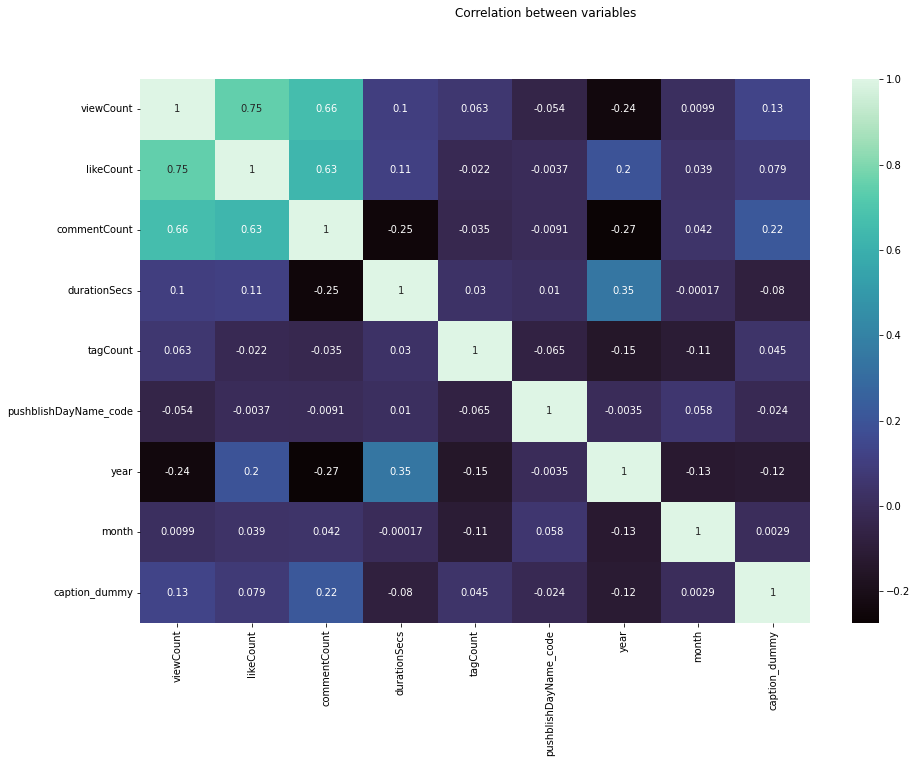

In [50]:
# correlation of the variables
corrMatrix = data_preprocessed.corr()

# heatmap of correlation 
plt.figure(figsize = (15,10))
sns.heatmap(corrMatrix, annot=True, cmap = "mako")
plt.suptitle("Correlation between variables")
plt.show()

Creating a scatter plot of the two variables, likes and view count, presents the following. 

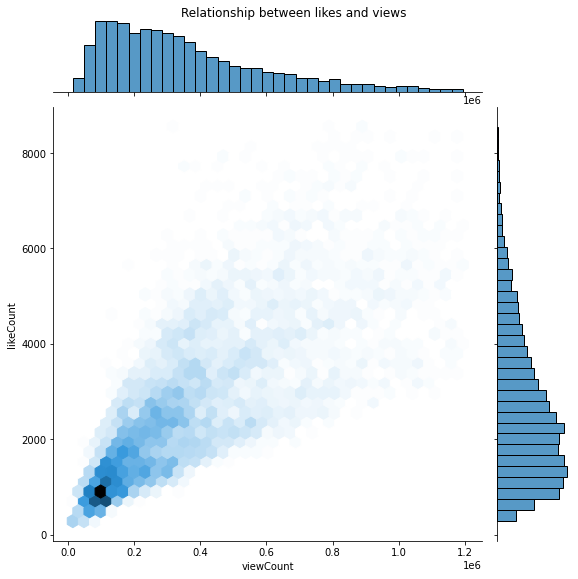

In [51]:
# scatter plot of views and likes
sns.jointplot(x="viewCount", y ="likeCount",kind="hex", data = data_preprocessed, height = 8)
plt.suptitle("Relationship between likes and views", y = 1)
plt.show()

As the view count increase, the number of likes increase. However the variations in the number of likes also increase. Additionally,  the scale between the two counts is significantly different and as such should be scaled. Further alternations to the data may also aid the model and its accuracy. 

## Feature engineering 
The views and likes should already exclude outliers. To handle the right skew which remains in the data, the log transformation of the two variables will be needed. 

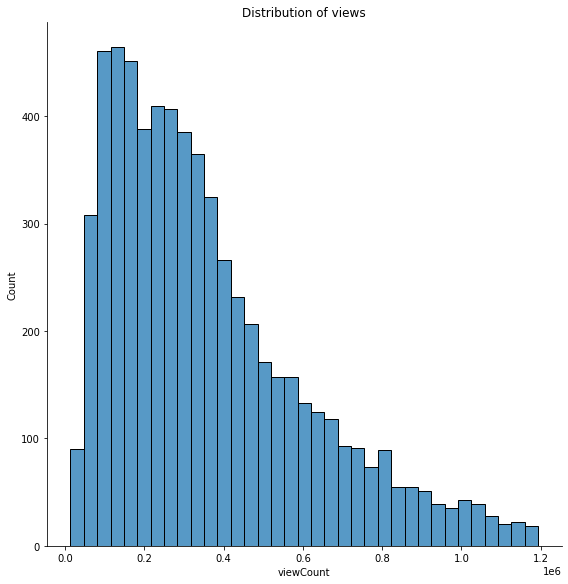

In [52]:
# distribution of views
sns.displot( x ="viewCount" , data = data_preprocessed, height = 8)
plt.title("Distribution of views")
plt.show()

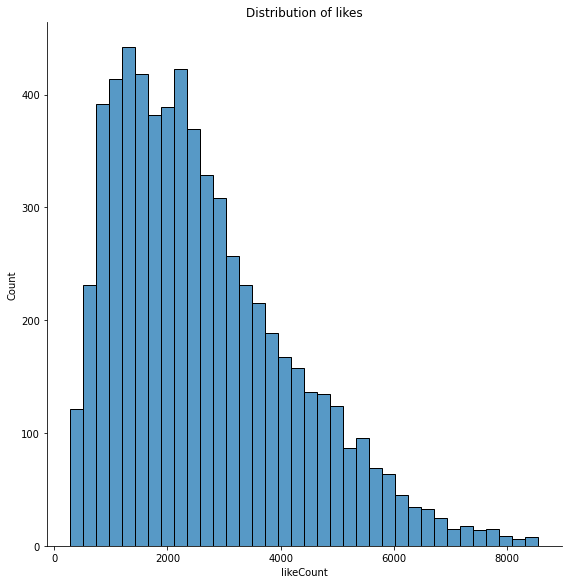

In [53]:
# distribution of likes
sns.displot( x ="likeCount" , data = data_preprocessed, height = 8)
plt.title("Distribution of likes")
plt.show()

In [54]:
# transform likes and views via the log function
data_preprocessed["log_like"] = np.log(data_preprocessed["likeCount"])
data_preprocessed["log_view"] = np.log(data_preprocessed["viewCount"])

This transforms the relationship to the following: 

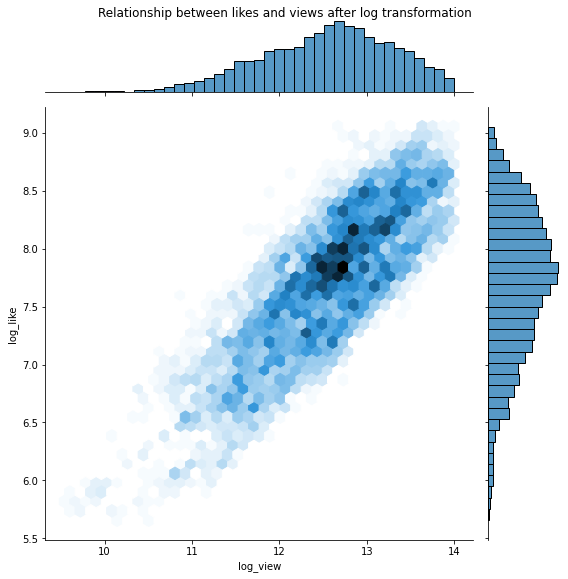

In [55]:
# revised relationship between likes and views
sns.jointplot(x="log_view", y ="log_like",kind="hex", data = data_preprocessed, height = 8)
plt.suptitle("Relationship between likes and views after log transformation", y = 1)
plt.show()

As the scale of the views to likes continue to differ greatly, the views will need to be scaled. This is to [ensure that the predictions have a mean of 0](https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=In%20regression%2C%20it%20is%20often,are%20set%20to%20their%20means.).  Using the resulting variables, the data can be split into 80% of training and 20% for testing. 

In [56]:
# establish variables - targets and inputs
targets = data_preprocessed["log_like"]

log_view = data_preprocessed["log_view"] 
log_view_metrix = log_view.values.reshape(-1,1)
inputs = log_view_metrix

# scale views
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

## Predicting likes from views
Using the resulting variables, the data can be split into 80% of training and 20% for testing. 

In [57]:
# import library for spliting data for train and testing a model. 
from sklearn.model_selection import train_test_split

In [58]:
# split variables to train and test 
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state= 360)

The predicted variables appear to have some variation from the actual values. Examining the regression score, the model has an accurate rate of 68.5%. This suggest that whilst the there is a relationship (log-log linear model) between the views and likes, it is not the only factor. Examining worst predictions, at times it can predict over 120% of the actual value. The predicted values were also generally higher than the actual values. 

In [59]:
# import libaray for linear regression
from sklearn.linear_model import LinearRegression

In [60]:
# create linear regression

reg = LinearRegression()
reg.fit(x_train, y_train)

# predict likes
y_hat = reg.predict(x_train)

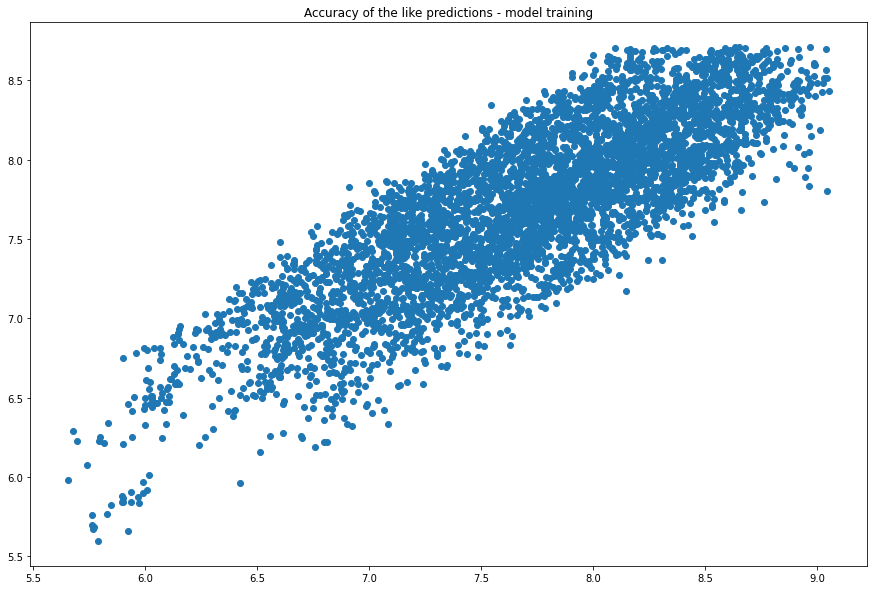

In [61]:
# plot predicted and actual likes (train values)
plt.figure(figsize = (15,10))
plt.scatter (y_train, y_hat)
plt.title("Accuracy of the like predictions - model training")
plt.show()

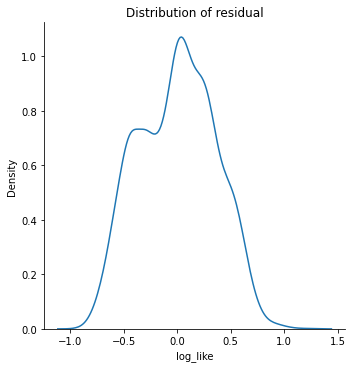

In [62]:
# distribution of residual
sns.displot(y_train-y_hat, kind="kde")
plt.title("Distribution of residual")
plt.show()

In [63]:
# accuracy score
reg.score(x_train, y_train)

0.6854328618018846

In [64]:
# intercept of linear regression
reg.intercept_

7.697692322824207

In [65]:
# change in % of likes for a 1% change in views 
reg.coef_

array([0.53063493])

In [66]:
# summary of the coefs 
reg_summary = pd.DataFrame(reg.coef_, columns =["weights"])
reg_summary["Features"]= "log_views"
reg_summary

,weights,Features
0,0.530635,log_views


In [67]:
# predict likes for test data
y_hat_test = reg.predict(x_test)

In [68]:
# library to evaluate model 
from sklearn import metrics

# find RMSE score
RMSE = np.sqrt(metrics.mean_absolute_error(y_test, y_hat_test))

print( round(RMSE,3), "is the explained variance score (R^2)")

0.543 is the explained variance score (R^2)


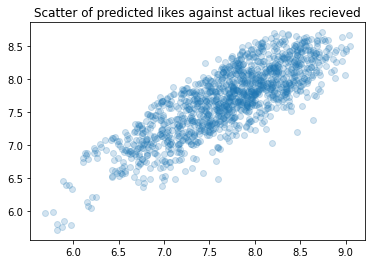

In [69]:
# Scatter of predicted test values and actual test values
plt.scatter (y_test, y_hat_test, alpha= 0.2)
plt.title("Scatter of predicted likes against actual likes recieved")
plt.show()

In [70]:
# create table of values
df_pf =pd.DataFrame (np.exp(y_hat_test), columns = ["Predict"])

y_test = y_test.reset_index(drop = True)
df_pf["Target"] =np.exp(y_test)

# calcuate the residual (difference between target and predicted likes)
df_pf["Residual"] =df_pf["Target"] - df_pf["Predict"]

# calcuate the residual in percentages
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"])*100
df_pf

,Predict,Target,Residual,Difference%
0,4931.813658,5426.0,494.186342,9.107747
1,1694.655195,1756.0,61.344805,3.493440
2,3916.547017,4383.0,466.452983,10.642322
3,2897.641470,3252.0,354.358530,10.896634
4,4427.535149,3075.0,-1352.535149,43.984883
...,...,...,...,...
1269,1751.610472,1611.0,-140.610472,8.728148
1270,2585.736522,3506.0,920.263478,26.248245
1271,4024.232198,3788.0,-236.232198,6.236330
1272,1280.145106,858.0,-422.145106,49.201061


In [71]:
# descriptive statsics of this new table
df_pf.describe()

,Predict,Target,Residual,Difference%
count,1274.000000,1274.000000,1274.000000,1274.000000
mean,2467.401435,2619.448980,152.047545,30.266447
std,1199.651118,1514.981134,1011.062859,23.641220
min,303.216658,297.000000,-2312.640177,0.004989
25%,1521.671645,1447.000000,-460.312916,12.588715
50%,2293.429361,2327.000000,38.355543,25.608862
75%,3214.468528,3503.250000,609.799023,43.078932
max,6077.362370,8480.000000,4870.799851,122.424357


In [72]:
# view the data with the biggest % difference between predicted and test values 
pd.options.display.max_rows = 50
df_pf.sort_values(by ="Difference%", ascending=False).head(25)

,Predict,Target,Residual,Difference%
733,3827.923190,1721.0,-2106.923190,122.424357
214,2281.274020,1046.0,-1235.274020,118.095031
547,2647.381638,1215.0,-1432.381638,117.891493
1014,976.224114,460.0,-516.224114,112.222633
999,1970.652112,946.0,-1024.652112,108.314177
713,979.582617,472.0,-507.582617,107.538690
360,2946.893429,1424.0,-1522.893429,106.944763
179,2092.375327,1013.0,-1079.375327,106.552352
979,1048.468099,509.0,-539.468099,105.985874
15,2024.044788,983.0,-1041.044788,105.904861


## Predicting likes from views, year of publication and comments

As the number of comments and to a lesser extent year of publication had a correlation with likes, it may be best to explore adding  these variables to the model. As comments has a similar distribution to likes and views, it too will need to be transformed. 

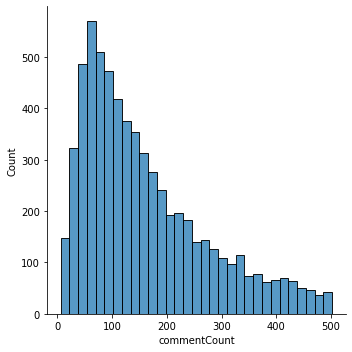

In [73]:
# distribution of comments 
sns.displot(x= "commentCount", data = data_preprocessed)
plt.show()

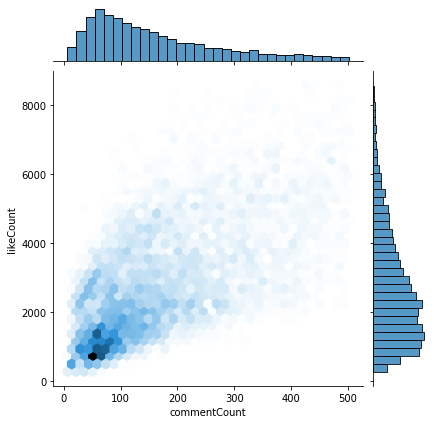

In [74]:
# relationship between comments and like values 
sns.jointplot(x="commentCount", y ="likeCount",kind="hex", data = data_preprocessed)
plt.show()

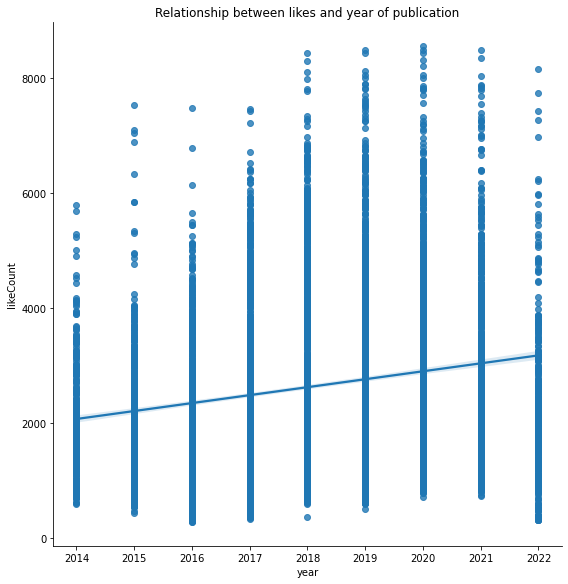

In [75]:
# relationship between year and likes 
sns.lmplot(x="year", y ="likeCount", data = data_preprocessed, height = 8)
plt.title("Relationship between likes and year of publication")
plt.show()

In [76]:
# transform comment
data_preprocessed["log_comment"] = np.log(data_preprocessed["commentCount"])

In [77]:
# new target and inputs
targets = data_preprocessed["log_like"]

inputs = data_preprocessed[["log_view", "log_comment", "year"]]

In [78]:
# scale features to ensure predicted values have a mean of 0 
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [79]:
# reestablish test and train dataset
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state= 360)

# create regression 
reg = LinearRegression()
# fit the model to training data
reg.fit(x_train, y_train)

# predict likes
y_hat = reg.predict(x_train)

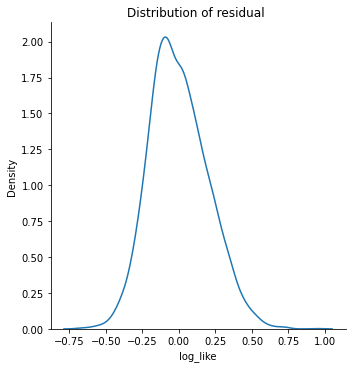

In [80]:
# distribution of residual 
sns.displot(y_train-y_hat, kind="kde")
plt.title("Distribution of residual ")
plt.show()

Under this model, the accuracy rises to high as 90% and the R^2 score is 0.4003. 

In [81]:
# find accuracy score
reg.score(x_train, y_train)

0.9027150044738871

In [82]:
# intercept of linear model
reg.intercept_

7.700580816870733

In [83]:
# coefs for each input
cdf = pd.DataFrame(reg.coef_, inputs.columns, columns = ["Coef"])
cdf

,Coef
log_view,0.485561
log_comment,0.176400
year,0.305718


In [84]:
# run model on test values
y_hat_test = reg.predict(x_test)

# create a data frame of predicted and test values.
df_pf2 =pd.DataFrame (np.exp(y_hat_test), columns = ["Predict"])

y_test = y_test.reset_index(drop = True)
df_pf2["Target"] =np.exp(y_test)

# calculate the difference between target and predicted valus. 
df_pf2["Residual"] =df_pf2["Target"] - df_pf2["Predict"]

# % change of the difference
df_pf2["Difference%"] = np.absolute(df_pf2["Residual"]/df_pf2["Target"])*100
df_pf2.describe()

,Predict,Target,Residual,Difference%
count,1274.000000,1274.000000,1274.000000,1274.000000
mean,2590.147528,2619.448980,29.301451,16.055736
std,1437.853205,1514.981134,622.956067,12.197203
min,253.201781,297.000000,-3444.561530,0.064480
25%,1466.430219,1447.000000,-266.492643,6.321791
50%,2361.064107,2327.000000,-42.194248,13.940883
75%,3374.521519,3503.250000,290.868283,22.624798
max,9256.845753,8480.000000,3330.624961,85.345925


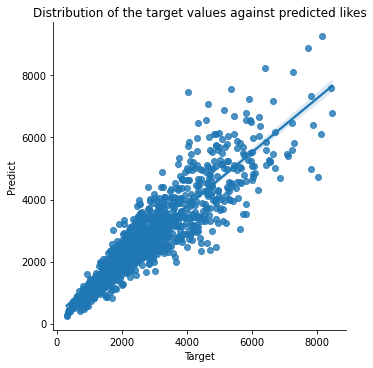

In [85]:
# distribution of predicted values vs target values 
sns.lmplot(x="Target", y="Predict", data=df_pf2,)
plt.title("Distribution of the target values against predicted likes")
plt.show()

In [86]:
# RMSE score on predicted values of test data 
RMSE = np.sqrt(metrics.mean_absolute_error(y_test, y_hat_test))

print( round(RMSE,5), "is the explained variance score (R^2)")

0.40033 is the explained variance score (R^2)


## Evaluating the model
Although this model has been build and appears to be relatively robust with a score of 90% and a RMSE of 0.4, it should be acknowledged that the Ordinary Least Squares (OLS) assumptions may not be fully applicable.  

Working through the OLS assumptions, the following can be stated about the model: 

    Linearity - This assumption holds after a log transformations. 

    No Endogeneity of Regressors - As the accuracy is only 90%, there may be missing variables. There were other data within the dataset which were not included that may improve the model further. There is also a risk of variables inaccessible that may also impact the likes rating. For instance, whether a YouTuber asks for likes and subscriptions in videos may impact the number of likes a video receives. 

    Normality and Homoiconicity - The sample is relatively large and there is a intercept. Therefore, normality assumption should apply.  As for homoscedastic, whilst the log transformation reduced the impact, there was still variations in the results. This may be the noise/randomness in the number of likes. 

    No Autocorrelation - As the data is cross sectional, this should not be an issue. 

    No Multicollinearity - The inclusion of both comments and views in the model violates this assumption. Views and comments share a correlation. More views will lead to more comments, though no user is required to comment. Therefore the impact of a change in view bleeds through from the inclusion of comments. 
    

### Model conforming to OLS 
Dropping comments should ensure that the OLS requirements are met, although the full scope of variables may be lacking in the model. However, doing so with no other changes will reduce the effectiveness of the model. Therefore, perhaps another variable could be added. 

Revisiting the heatmap, the next variable with the highest correlation to likes is the duration. As such, this variable may be added in place of comments. This leads to a model with a score of 89.6%.  The accuracy has decreased but the model remains more robust. Under this model, the predicted values remain higher than the actual values and in the worst case predicted a like count over 100% higher than the actual figure.

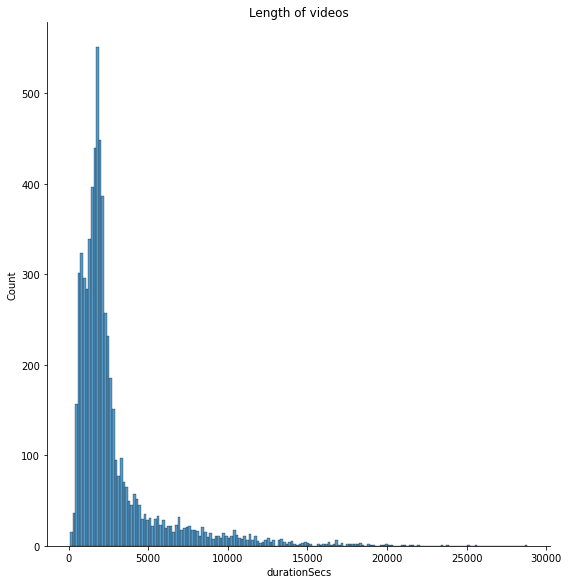

In [87]:
# Length of videos 
sns.displot( x ="durationSecs" , data = data_preprocessed, height = 8)
plt.title("Length of videos")
plt.show()

In [88]:
# remove outliers via IQR
q25 = data_preprocessed["durationSecs"].quantile(0.25)
q75 = data_preprocessed["durationSecs"].quantile(0.75)

iqr = q75-q25

upper_limit = q75 + 1.5*iqr
lower_limit = q25-1.5*iqr

# excluude variables that fall above or below the limits
data_preprocessed = data_preprocessed[(data_preprocessed["durationSecs"]<= upper_limit)]

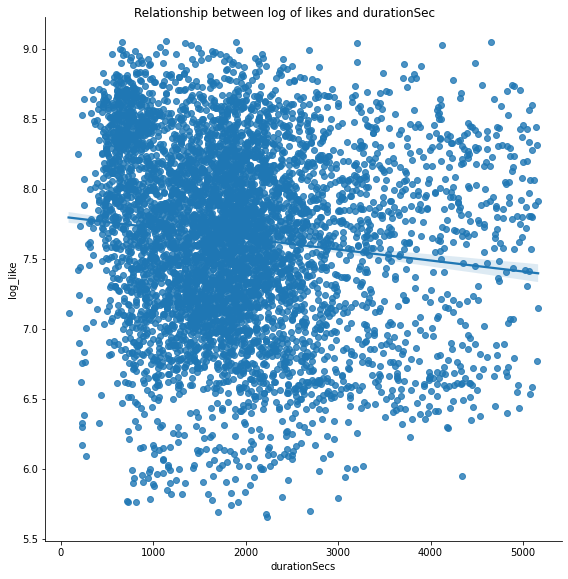

In [89]:
# relationship between likes and duration of videos
sns.lmplot(x="durationSecs", y ="log_like", data = data_preprocessed, height = 8, )
plt.suptitle("Relationship between log of likes and durationSec", y = 1)
plt.show()

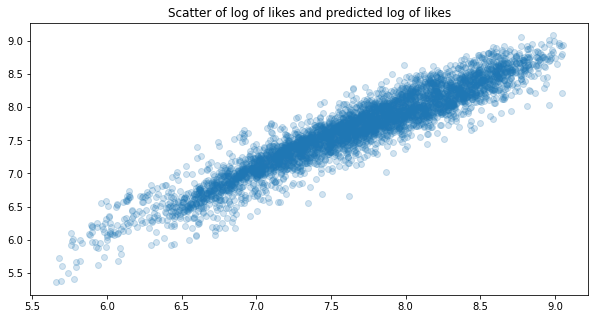

In [90]:
# new target and inputs
targets = data_preprocessed["log_like"]

inputs = data_preprocessed[["log_view",  "year","durationSecs" ]]

# scale features 
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

# reestablish test and train dataset
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state= 360)

# create regression 
reg = LinearRegression()
# fit the model to training data
reg.fit(x_train, y_train)

# check the prdiction of models in train data
y_hat = reg.predict(x_train)
plt.figure(figsize = (10,5))
plt.scatter (y_train, y_hat, alpha =.2)
plt.title("Scatter of log of likes and predicted log of likes")
plt.show()

In [91]:
# find accuracy score
reg.score(x_train, y_train)

0.8956405311204512

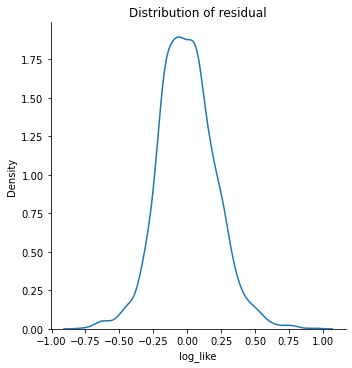

In [92]:
# distribution of the residual 
sns.displot(y_train-y_hat, kind="kde")
plt.title("Distribution of residual")
plt.show()

In [93]:
# intercept of linear model
reg.intercept_

7.651775938125483

In [94]:
# coefs for each input
cdf = pd.DataFrame(reg.coef_, inputs.columns, columns = ["Coef"])
cdf

,Coef
log_view,0.639296
year,0.319320
durationSecs,-0.077858


In [95]:
# run model on test values
y_hat_test = reg.predict(x_test)

# create a data frame of predicted and test values.
df_pf3 =pd.DataFrame (np.exp(y_hat_test), columns = ["Predict"])

y_test = y_test.reset_index(drop = True)
df_pf3["Target"] =np.exp(y_test)

# calculate the difference between target and predicted valus. 
df_pf3["Residual"] =df_pf3["Target"] - df_pf3["Predict"]

# % change of the difference
df_pf3["Difference%"] = np.absolute(df_pf3["Residual"]/df_pf3["Target"])*100
df_pf3.describe()

,Predict,Target,Residual,Difference%
count,1115.000000,1115.000000,1115.000000,1115.000000
mean,2494.118985,2540.119283,46.000298,16.675848
std,1396.607594,1533.237163,603.611729,14.056663
min,349.557982,336.000000,-2068.488518,0.003402
25%,1427.871002,1372.500000,-269.427488,7.212887
50%,2229.102954,2182.000000,-22.586510,13.903754
75%,3317.786621,3441.000000,284.986087,22.568344
max,7423.668618,8475.000000,3670.992578,101.214112


In [96]:
df_pf3.sort_values(by = "Difference%", ascending= False).head(10)

,Predict,Target,Residual,Difference%
1113,1967.874019,978.0,-989.874019,101.214112
641,2227.781186,1123.0,-1104.781186,98.377666
94,2390.838149,1225.0,-1165.838149,95.170461
614,2869.522115,1512.0,-1357.522115,89.783209
866,4471.488518,2403.0,-2068.488518,86.079422
823,2033.532142,1093.0,-940.532142,86.050516
1015,2455.446156,1321.0,-1134.446156,85.877832
648,3660.199136,1991.0,-1669.199136,83.837224
68,655.886301,365.0,-290.886301,79.694877
190,1196.483756,667.0,-529.483756,79.382872


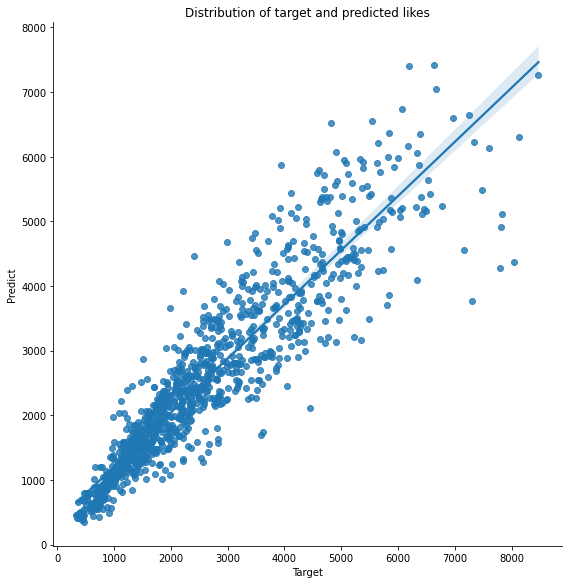

In [97]:
# distribution of predicted values vs target values 
sns.lmplot(x="Target", y="Predict", data=df_pf3,height = 8)
plt.title("Distribution of target and predicted likes")
plt.show()

In [98]:
# RMSE score on predicted values of test data 
RMSE = np.sqrt(metrics.mean_absolute_error(y_test, y_hat_test))

print( round(RMSE,5), "is the explained variance score (R^2)")

0.406 is the explained variance score (R^2)


It should be acknowledged that this model still faces issue with multicollinearity though the effects should be less prominent. Year of publication appears to have a correlation with views. Older the video, the more views it garners. However, under this model, the impact of multicollinearity should be more limited than the previous model which used comments and views to predict the likes. 

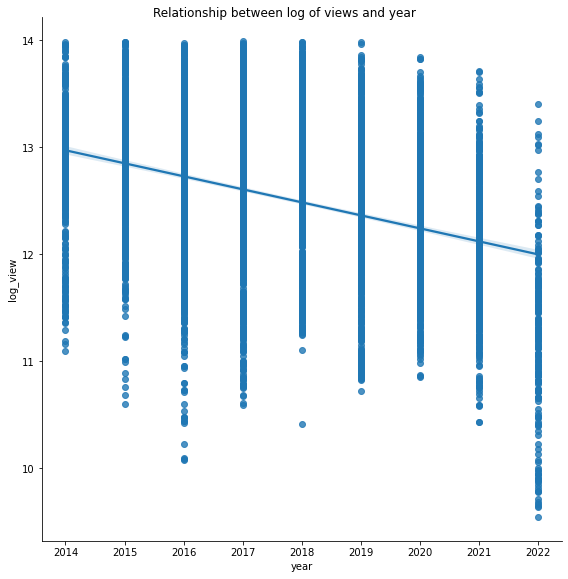

In [99]:
# relationship between likes and duration of videos
sns.lmplot(x="year", y ="log_view", data = data_preprocessed, height = 8, )
plt.suptitle("Relationship between log of views and year", y = 1)
plt.show()

# Conclusion 
It was extremely interesting to discover how consistent 2BRO has been over the past 12 years. It is clear that they have a passion for their job, uploading every day and the majority of the clips lasting approx. 30mins. As technology has shifted throughout the 12 years, the video quality too has moved to HD from SD. 

As for the modelling, there is a relationship between the view count and the likes. However, it is not a straight forward relationship. Both the independent and dependent variables required log transformation before modelling. In addition, the model requires the inclusion of other variables to secure a reasonable accuracy rate. 

Caution should be exercised during this process as some variables are correlated with one another. Comments alongside years offered the best model. However, the inclusion of comments and views violated one of the key assumptions of OLS - multicollinearity. The next best predictor of likes is year. This too, however, is correlated with views as older the video, the more like it is to have more views, although the correlation between views and years is far weaker than that comments and views. Therefore, whilst the best model was accurate just under 90% of the time and and has a RMSE of 0.406, it still has some issues concerning OLS.

Additionally, the models may further be improved through the use of further changes in the data. For instance, could videos such as wrap ups be excluded? Did the data on specific games differ from others, ie does Death by Daylight gameplay secure more likes than other games? Another aspect to consider may be that 2BRO fails to convert views to likes for reasons such as not reminding viewers to like the video. 

The null hypothesis could not be rejected as without the log transformation the relationship was not linear and other variables were required to adequately model the relationship. 